In [57]:
import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation
from keras import optimizers
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


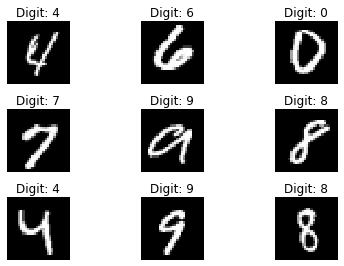

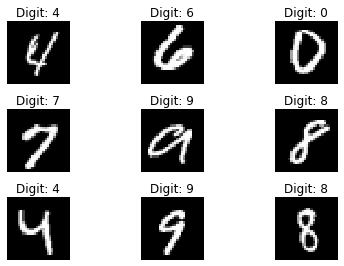

In [59]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i+700], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i+700]))
  plt.xticks([])
  plt.yticks([])
fig

Text(0.5, 1.0, 'Pixel Value Distribution')

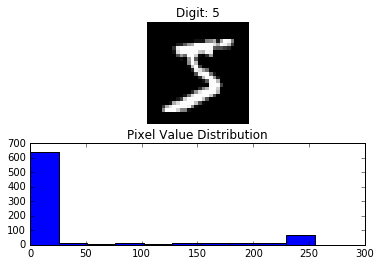

In [60]:

fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
#fig

In [61]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [62]:

print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [63]:

# one-hot encoding using keras' numpy-related utilities
num_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [64]:
num_epoch=10
batch_size=128

In [65]:

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [66]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total para

In [67]:
# compiling the sequential model

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [68]:
hist = model.fit(X_train,Y_train,batch_size=batch_size, validation_data=(X_test,Y_test),epochs=num_epoch)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.2466 - acc: 0.9262 - val_loss: 0.1177 - val_acc: 0.9634
Epoch 2/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.1017 - acc: 0.9689 - val_loss: 0.0859 - val_acc: 0.9731
Epoch 3/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.0735 - acc: 0.9766 - val_loss: 0.0798 - val_acc: 0.9728
Epoch 4/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0558 - acc: 0.9824 - val_loss: 0.0589 - val_acc: 0.9810
Epoch 5/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0474 - acc: 0.9850 - val_loss: 0.0580 - val_acc: 0.9822
Epoch 6/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.0397 - acc: 0.9870 - val_loss: 0.0657 - val_acc: 0.9814
Epoch 7/10
60000/60000 [==============================] - 16s 259us/step - loss: 0.0334 - acc: 0.9893 - val_loss: 0.

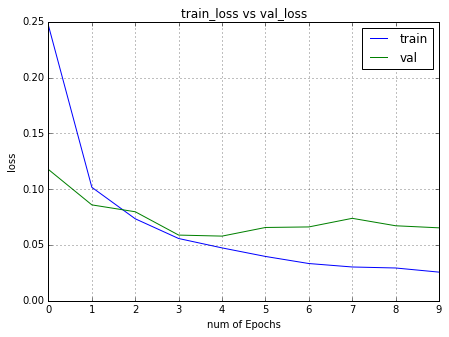

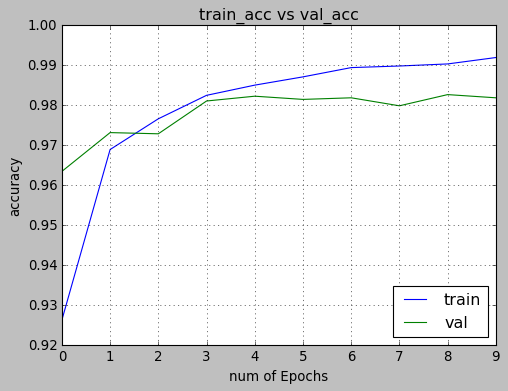

In [69]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# to save figure
plt.savefig('loss_curve_nn_ex-2')

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
# to save figure
plt.savefig('acc_curve_nn_ex-2')

In [86]:
score = model.evaluate(X_test, Y_test)
print (score)
print ('loss:', score[0])
print ('acc: ', str(score[1]*100) + '%')

10000/10000 [==============================] - 3s 256us/step
[0.06538650850603481, 0.9818]
loss: 0.06538650850603481
acc:  98.18%


In [87]:

# Predict output probability
model.predict(X_test[10:11])

array([[1.0000000e+00, 3.5752601e-12, 1.2051790e-08, 7.6805972e-13,
        1.7163196e-11, 6.0515158e-14, 2.0923974e-10, 7.5451945e-10,
        3.8309983e-13, 3.4355871e-08]], dtype=float32)

In [88]:
Y_test[10:11]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [89]:
model.predict_classes(X_test[10:15])

array([0, 6, 9, 0, 1], dtype=int64)

In [90]:
from keras.models import load_model

In [91]:
model.save('nn_model_ex-2.h5')

In [92]:
loaded_model=load_model('nn_model_ex-2.h5')

In [93]:
# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total para

In [94]:
model.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_7',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Activation',
   'config': {'name': 'activation_5',
    'trainable': True,
    'activation': 'relu'}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_5',
    'trainable': True,
    'rate': 0.2,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_8',
    'trainable': True,
    'units':

In [95]:
len(model.layers)

7

In [96]:
model.layers[0].input_shape

(None, 784)

In [97]:
model.layers[0].output_shape

(None, 512)

In [98]:
model.layers[0].get_weights()

[array([[-4.8357874e-02, -2.4225406e-02, -1.1275686e-02, ...,
          2.2488251e-02,  6.1565474e-02,  4.5589112e-02],
        [ 2.2797324e-02, -5.8407657e-02,  6.0245544e-03, ...,
          4.4057883e-02,  4.8969716e-02,  4.5010768e-02],
        [ 9.2418492e-04, -4.8356444e-02, -5.8333650e-02, ...,
         -6.3668266e-03, -5.1167503e-02,  3.8130052e-02],
        ...,
        [ 1.6842529e-02,  6.2286854e-06,  1.6731828e-02, ...,
          6.9783628e-04,  4.7050141e-02, -4.2967260e-02],
        [-1.8732008e-02,  4.2699300e-02,  8.2828924e-03, ...,
          6.7840070e-02,  1.4269762e-02, -5.7109609e-02],
        [ 4.6537876e-02, -1.0188095e-02,  6.9818124e-03, ...,
          5.1587448e-02,  3.3977002e-02, -2.2085860e-02]], dtype=float32),
 array([-0.03115242,  0.07483615,  0.0091499 , -0.04587293,  0.05132501,
        -0.04997332, -0.02986344,  0.07019149,  0.02585765, -0.0361398 ,
        -0.02620741,  0.04006032,  0.02710854, -0.02246791,  0.01741502,
        -0.00068743, -0.0186785

In [99]:
wt = model.layers[0].get_weights()
#wt.shape
weights = wt[0]
bias = wt[1]
print ('weights_shape: ',wt[0].shape)
print ('bias_shape: ',wt[1].shape)

weights_shape:  (784, 512)
bias_shape:  (512,)


In [100]:
model.layers[0].trainable

True

### Confusion matrix

In [101]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(0)', 'class 1(1)', 'class 2(2)','class 3(3)','class 4(4)','class 5(5)','class 6(6)'
                ,'class 7(7)','class 8(8)','class 9(9)']



In [102]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 972    1    0    1    1    0    2    0    2    1]
 [   0 1126    2    1    0    1    2    1    2    0]
 [   3    0 1005    3    2    0    2   12    5    0]
 [   0    0    1  992    0    4    0    6    3    4]
 [   2    1    3    1  959    0    1    1    0   14]
 [   1    0    0   13    1  870    1    1    3    2]
 [   2    3    0    1    6    7  935    0    4    0]
 [   0    1    4    0    0    0    0 1018    1    4]
 [   0    0    1    3    3    1    0    4  956    6]
 [   2    2    0    4    5    2    0    8    1  985]]


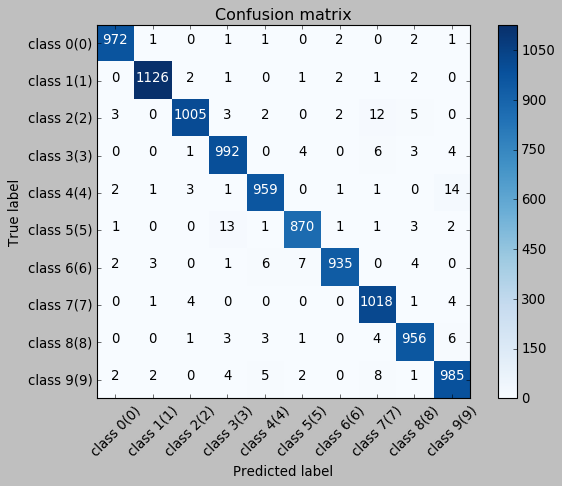

In [103]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()